In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 500)

- in macro:

    year
    
    npopul999i: population

In [3]:
## Creation of corresponding table

In [3]:


"""
    Creates a new column of the dataset corresponding to the equivalent value in the corresponding table :
    ex : av becomes avenue (as it is in the corresponding table)
    
    @ df : the dataframe in which we want to create the new column
    @ df_corresp : the correspence dataframe  with a second column which is the new label we want
    @ index_column_corres : the column in the correspondence dataframe which as same data as the one in the main dataframe
    @ index_column_replacer : the column in the correspondence dataframe from which we will put the data in the new column
    @ replace_nan : the boolean to choose if we replace nan value by nothing
"""
def replace_by_correspondence(df, df_corresp, column_name, index_column_corres = 0, index_column_replacer = 1, replace_nan = False):
    column_replacer = df_corresp.columns[index_column_replacer]
    column_corres = df_corresp.columns[index_column_corres]
    df_corresp = df_corresp.rename(columns={column_corres: column_name}) # we rename the column for the join
    dictionary = df_corresp.set_index(column_name).to_dict()[column_replacer]
    df[column_name + '_corresp'] = df[column_name].map(dictionary)
    # We replace nan values by nothing
    if (replace_nan):
        df[column_name + '_corresp'] = df[column_name + '_corresp'].fillna("")
    return df



In [4]:
path_country_corresp = '../Data/Corresponding/countryCode.csv'
df_country_code = pd.read_csv(path_country_corresp, sep=';', encoding='utf-8')

## Exploration
We explore one macro dataset  for a specific country (AD)

In [6]:
macro = pd.read_csv('../Data/Raw/WID_AD_MacroData.csv',
                skiprows=7, sep=';')
macro.head()

,Variable Code,country,year,perc,agdpro999i,npopul999i,mgdpro999i,inyixx999i,xlceux999i,xlcusx999i,xlcyux999i
0,NaN,AD,2017,p0p100,34407.000000,76555.0,2.634028e+09,1.000000,1.0,0.887487,0.131302
1,NaN,AD,2016,p0p100,33668.890625,77281.0,2.601966e+09,0.993134,NaN,NaN,NaN
2,NaN,AD,2015,p0p100,32946.570312,78014.0,2.570294e+09,0.986316,NaN,NaN,NaN
3,NaN,AD,2014,p0p100,32172.791016,79223.0,2.548825e+09,0.990829,NaN,NaN,NaN
4,NaN,AD,2013,p0p100,30846.962891,80788.0,2.492065e+09,0.991824,NaN,NaN,NaN


### Get Population 

In [7]:
import glob
list_mac = glob.glob("../Data/Raw/*_MacroData.csv")

In [8]:
dfs = []
for file in list_mac:
    df = pd.read_csv(file, skiprows=7, sep=';')
    df = replace_by_correspondence(df, df_country_code, "country")
    if 'aptinc992j' in df.columns:
        df.rename(columns={'npopul999i':df['country_corresp'][0]}, inplace=True)
    else:
        continue    
    #print(df)
    new_df = df[['year',df['country_corresp'][0]]]
    dfs.append(new_df)

In [9]:
from functools import reduce
df_pop = reduce(lambda df1,df2: pd.merge(df1,df2,on='year', how='outer'), dfs)

In [10]:
df_pop = df_pop.sort_values(by=['year'], ascending=False).reset_index().drop(['index'], axis=1)
df_pop.head()

,year,United-Arab-Emirates,Bahrain,Brazil,Czech,Egypt,France,India,Iraq,Jordan,Kuwait,Lebanon,Oman,Palestine,Qatar,Saudi-Arabia,Syrian,Thailand,Turkey,USA,Middle,Yemen
0,2017,NaN,NaN,NaN,10544422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69037512.0,NaN,NaN,NaN,NaN
1,2016,9266971.0,1396829.0,209567920.0,10537118.0,93383568.0,66142540.0,1.326802e+09,37547688.0,7747800.0,4007146.0,5988153.0,4654471.0,4797239.0,2291368.0,32157974.0,18563596.0,68863512.0,79622064.0,323593376.0,408945619.0,27477600.0
2,2015,9156963.0,1377237.0,207847520.0,10529983.0,91508080.0,65851544.0,1.311050e+09,36423396.0,7594547.0,3892115.0,5850743.0,4490541.0,4668466.0,2235355.0,31540372.0,18502412.0,68657600.0,78665832.0,321704000.0,401847547.0,26832216.0
3,2014,9086139.0,1361930.0,206077904.0,10524783.0,89579672.0,65558808.0,1.295292e+09,35273292.0,7416083.0,3753121.0,5612096.0,4236057.0,4542059.0,2172065.0,30886544.0,18772480.0,68416768.0,77523792.0,319233000.0,394542654.0,26183676.0
4,2013,9039978.0,1349427.0,204259376.0,10510719.0,87613912.0,65263088.0,1.279499e+09,34107368.0,7214832.0,3593689.0,5286990.0,3906912.0,4418341.0,2101288.0,30201052.0,19322592.0,68143064.0,76223640.0,316796000.0,387065685.0,25533216.0


In [11]:
## Let's save the population csv
df_pop.to_csv('../Data/Preprocessed/Population.csv', index=False)

- in inequality:
    
    aptinc992j/i: income
    
    bfiinc992i: inverse of pareto index

In [12]:
import glob
list_ineq = glob.glob("../Data/Raw/*_InequalityData.csv")

### Get income

In [13]:
dfs = []
for file in list_ineq:
    df = pd.read_csv(file, skiprows=7, sep=';')
    df = replace_by_correspondence(df, df_country_code, "country")

    df = df[df.perc == 'p0p100']
    if 'aptinc992j' in df.columns:
        df.rename(columns={'aptinc992j':df['country_corresp'][0]}, inplace=True)
    elif 'aptinc992i' in df.columns:
        df.rename(columns={'aptinc992i':df['country_corresp'][0]}, inplace=True)
    else:
        continue    
    new_df = df[['year',df['country_corresp'][0]]]
    dfs.append(new_df)

In [14]:
from functools import reduce
df_income = reduce(lambda df1,df2: pd.merge(df1,df2,on='year', how='outer'), dfs)

In [15]:
df_income = df_income.sort_values(by=['year'], ascending=False).reset_index().drop(['index'], axis=1)

In [16]:
df_income.head()

,year,United-Arab-Emirates,Argentina,Australia,Bahrain,Brazil,Czech,Denmark,Egypt,Spain,France,United-Kingdom,Ghana,Hungary,India,Iraq,Italy,Jordan,Japan,Kenya,Korea,Kuwait,Lebanon,Mauritius,Malawi,Malaysia,Nigeria,Norway,New-Zeland,Oman,Palestine,Qatar,Russian,Saudi-Arabia,Seychelles,Singapore,Syrian,Thailand,Turkey,Uganda,USA,Uruguay,Middle,Yemen,South,Zambia,Zimbabwe
0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32982536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223927.210771,34634.992532,NaN,NaN,NaN,10060.716948,NaN,NaN,NaN,NaN
1,2015,NaN,NaN,76496.224809,8686.009934,37113.481525,399086.656076,NaN,45416.167245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32304968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643350.260535,NaN,NaN,NaN,NaN,214121.560052,34293.839455,NaN,NaN,NaN,9990.553891,NaN,NaN,NaN,NaN
2,2014,NaN,NaN,75941.754421,NaN,39518.882834,377301.347352,NaN,NaN,NaN,35777.836,32403.920127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31827440.0,NaN,1.646583e+07,NaN,NaN,NaN,NaN,NaN,63744.710938,NaN,NaN,NaN,673909.280602,NaN,NaN,79168.007812,NaN,209758.606822,33889.649085,NaN,67454.505940,NaN,9874.237468,NaN,NaN,NaN,NaN
3,2013,NaN,NaN,75788.279105,NaN,42218.102581,370644.531755,NaN,NaN,NaN,35566.770,32151.775152,NaN,NaN,139758.528611,NaN,NaN,5631.914627,NaN,NaN,31432330.0,14982.984682,1.693425e+07,NaN,NaN,NaN,NaN,NaN,62219.886719,NaN,NaN,NaN,670470.803252,NaN,NaN,78772.218750,NaN,207294.237941,33620.144479,NaN,66210.526868,NaN,9795.628558,NaN,NaN,NaN,NaN
4,2012,NaN,NaN,75230.553798,NaN,40562.313406,374243.579835,NaN,43565.152081,22849.808594,35468.711,31886.933118,NaN,NaN,134295.200980,NaN,NaN,NaN,NaN,NaN,31081460.0,NaN,1.867175e+07,NaN,NaN,46884.574219,NaN,NaN,60186.812500,NaN,NaN,254851.215558,673087.474626,NaN,NaN,76919.367188,NaN,209108.689268,33069.504234,NaN,65976.022668,496473.125,9762.094695,NaN,119600.34375,NaN,NaN


In [17]:
## Let's save the income csv
df_income.to_csv('../Data/Preprocessed/Income.csv', index=False)

### Get wealth

In [18]:
dfs = []
for file in list_ineq:
    df = pd.read_csv(file, skiprows=7, sep=';')
    df = replace_by_correspondence(df, df_country_code, "country")
    df = df[df.perc == 'p0p100']
    if 'ahweal992i' in df.columns:
        df.rename(columns={'ahweal992i':df['country_corresp'][0]}, inplace=True)
    else:
        continue    
    new_df = df[['year',df['country_corresp'][0]]]
    dfs.append(new_df)

In [19]:
from functools import reduce
df_wealth = reduce(lambda df1,df2: pd.merge(df1,df2,on='year', how='outer'), dfs)

In [20]:
df_wealth = df_wealth.sort_values(by=['year'], ascending=False).reset_index().drop(['index'], axis=1)

In [21]:
df_wealth.head()

,year,Czech,Denmark,Finland,France,United-Kingdom,Italy,Japan,Korea,Netherlands,Norway,Russian,Singapore,Taiwan,USA
0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,NaN,NaN,NaN,205132.08,NaN,NaN,2.362440e+07,NaN,NaN,1.839850e+06,2384569.50,NaN,NaN,310446.406250
2,2014,1.119289e+06,1.577861e+06,130630.065261,205493.81,NaN,NaN,2.371549e+07,NaN,206503.912384,1.732195e+06,2446600.25,349725.4375,NaN,302686.625000
3,2013,1.117217e+06,1.518426e+06,128698.777511,206265.06,NaN,183513.628205,2.331834e+07,104694416.0,202714.176358,1.675399e+06,2395503.50,347189.7500,NaN,280457.968750
4,2012,1.109685e+06,1.472944e+06,125187.398308,206382.17,118429.295896,188315.922724,2.246090e+07,105053832.0,209985.756166,1.617766e+06,2281087.75,335128.7500,4697967.5,252429.234375


In [22]:
## Let's save the income csv
df_wealth.to_csv('../Data/Preprocessed//Wealth.csv', index=False)

## Get Gini

In [18]:
# Source : https://data.worldbank.org/indicator/SI.POV.GINI?view=map&year=2000
path_gini = '../Data/Raw/API_SI.POV.GINI_DS2_en_csv_v2_10576671/API_SI.POV.GINI_DS2_en_csv_v2_10576671.csv'
df_gini = pd.read_csv(path_gini, sep=',', skiprows=4,encoding='utf-8')

In [19]:
df_gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
# Suppresion de certaines colonnes
df_gini2000 = df_gini
coupure = 1960
nbAn = 2018 - coupure
print(nbAn)

# Si l'on souhaite ne garder que certains années
#for i in range(1960,1990):
    #df_gini2000 = df_gini2000.drop(columns=str(i))
    
df_gini2000 = df_gini2000.drop(columns="Indicator Name")
df_gini2000 = df_gini2000.drop(columns="Indicator Code")
df_gini2000 = df_gini2000.drop(columns="Unnamed: 63")
CN = df_gini2000.loc[:,['Country Name']].values.flatten().tolist()
CC = df_gini2000.loc[:,['Country Code']].values.flatten().tolist()
df_gini2000 = df_gini2000.drop(columns="Country Name")
df_gini2000 = df_gini2000.drop(columns="Country Code")
df_gini2000 = df_gini2000.drop(columns="2018")
df_gini2000 = df_gini2000.T
df_gini2000.columns = CC

# Suprresion des pays pour lesquels on n'a pas de valeur de gini
sumna = df_gini2000.isnull().sum(axis = 0)
nogini = sumna[sumna == nbAn].index.tolist()
for p in nogini:
    df_gini2000 = df_gini2000.drop(columns=p)
sumna = df_gini2000.isnull().sum(axis = 0)

print(df_gini2000.shape)


58
(58, 164)


In [321]:
sumna = df_gini2000.isnull().sum(axis = 0)

In [324]:
sumna[sumna < 30].index.tolist()

['ARG', 'BRA', 'CRI']

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  2.,  2.,  0.,  5.,  0.,  2.,  0.,  4.,
         0.,  3.,  0.,  1.,  0.,  0.,  3.,  0.,  4.,  0., 18.,  0.,  8.,
         6.,  0.,  7.,  0.,  4.,  0.,  5.,  0.,  7.,  8.,  0., 10.,  0.,
        13.,  0., 14.,  0., 17., 15.]),
 array([25.        , 25.55172414, 26.10344828, 26.65517241, 27.20689655,
        27.75862069, 28.31034483, 28.86206897, 29.4137931 , 29.96551724,
        30.51724138, 31.06896552, 31.62068966, 32.17241379, 32.72413793,
        33.27586207, 33.82758621, 34.37931034, 34.93103448, 35.48275862,
        36.03448276, 36.5862069 , 37.13793103, 37.68965517, 38.24137931,
        38.79310345, 39.34482759, 39.89655172, 40.44827586, 41.        ,
        41.55172414, 42.10344828, 42.65517241, 43.20689655, 43.75862069,
        44.31034483, 44.86206897, 45.4137931 , 45.96551724, 46.51724138,
        47.06896552, 47.62068966, 48.17241379, 48.72413793, 49.27586207,
        49.

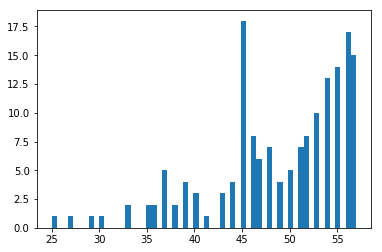

In [335]:
import matplotlib.pyplot as plt
# Nb de NA par Pays
plt.hist(sumna,bins=(nbAn))

In [303]:
# FillNA par interpolate
def ReplaceNA_gini(df):
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    return dffillna

In [315]:
# FillNA
df_gini_FillNA = df_gini2000
for p in df_gini_FillNA.columns:
    df_gini_FillNA.loc[:,[p]] = ReplaceNA_gini(df_gini_FillNA.loc[:,[p]])
df_gini_FillNA = round(df_gini_FillNA,1)   

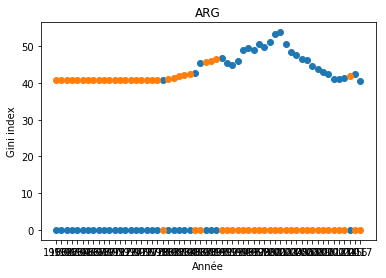

In [332]:
# Visualisation du fillNA
def ReplaceNA(df):
    dfavecna = df.fillna(0)
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    dfdiff = dffillna - dfavecna
    plt.plot(dfavecna,'o')
    plt.plot(dfdiff,'o')
    plt.title(df.columns[0])
    plt.xlabel("Année")
    plt.ylabel("Gini index")
    return dffillna
    
dfssNA = ReplaceNA(df_gini2000.loc[:,["ARG"]])

In [300]:
## Let's save the gini csv
df_gini2000.to_csv('../Data/Preprocessed/Gini_beforeFillNA.csv', index=True)

In [317]:
## Let's save the gini csv
df_gini_FillNA.to_csv('../Data/Preprocessed/Gini_afterFillNA.csv', index=True)

In [333]:
# Visualisation des pays ayant eu la plus grande variation d'indice de Gini
def MaxAmpGini(df,Pays):
    return round(100*(df.loc[:,[Pays]].max()-df.loc[:,[Pays]].min())/df.loc[:,[Pays]].min(),1)
mARG = MaxAmpGini(df_gini2000,"ARG")

In [334]:
for p in df_gini2000.columns:
    mag = MaxAmpGini(df_gini2000,p)[0]
    if mag > 50:
        print(p,mag)

CRI 50.9
HUN 65.2
KGZ 73.1
MDA 64.5
MLI 52.7
MRT 53.7
MWI 64.9
ROU 70.0
RWA 79.9
UKR 63.7


## Get PIB

In [337]:
# Source : https://donnees.banquemondiale.org/indicateur/NY.GDP.MKTP.CD
path_PIB = '../Data/Raw/API_NY.GDP.MKTP.CD_DS2_fr_csv_v2_10581919/API_NY.GDP.MKTP.CD_DS2_fr_csv_v2_10581919.csv'
df_pib = pd.read_csv(path_PIB, sep=',', skiprows=4,encoding='utf-8')

In [338]:
df_pib.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,PIB ($ US courants),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN,NaN
2,Angola,AGO,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,NaN,NaN
3,Albanie,ALB,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN,NaN
4,Andorre,AND,PIB ($ US courants),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN,NaN


In [339]:
df_pib2000 = df_pib
coupure = 1960
nbAn = 2018 - coupure
print(nbAn)

# Si l'on souhaite supprimer certaines années
#for i in range(1960,1990):
    #df_pib2000 = df_pib2000.drop(columns=str(i))
    
df_pib2000 = df_pib2000.drop(columns="Indicator Name")
df_pib2000 = df_pib2000.drop(columns="Indicator Code")
df_pib2000 = df_pib2000.drop(columns="Unnamed: 63")
CN = df_pib2000.loc[:,['Country Name']].values.flatten().tolist()
CC = df_pib2000.loc[:,['Country Code']].values.flatten().tolist()
df_pib2000 = df_pib2000.drop(columns="Country Name")
df_pib2000 = df_pib2000.drop(columns="Country Code")
df_pib2000 = df_pib2000.drop(columns="2018")
df_pib2000 = df_pib2000.T
df_pib2000.columns = CC

print(df_pib2000.shape)
df_pib2000.head()

58
(58, 264)


,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CEB,CHE,CHI,CHL,CHN,CIV,CMR,COD,COG,COL,COM,CPV,CRI,CSS,CUB,CUW,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,EAP,EAR,EAS,ECA,ECS,ECU,EGY,EMU,ERI,ESP,EST,ETH,EUU,FCS,FIN,FJI,FRA,FRO,FSM,GAB,GBR,GEO,GHA,GIB,GIN,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUM,GUY,HIC,HKG,HND,HPC,HRV,HTI,HUN,IBD,IBT,IDA,IDB,IDN,IDX,IMN,IND,INX,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JOR,JPN,KAZ,KEN,KGZ,KHM,KIR,KNA,KOR,KWT,LAC,LAO,LBN,LBR,LBY,LCA,LCN,LDC,LIC,LIE,LKA,LMC,LMY,LSO,LTE,LTU,LUX,LVA,MAC,MAF,MAR,MCO,MDA,MDG,MDV,MEA,MEX,MHL,MIC,MKD,MLI,MLT,MMR,MNA,MNE,MNG,MNP,MOZ,MRT,MUS,MWI,MYS,NAC,NAM,NCL,NER,NGA,NIC,NLD,NOR,NPL,NRU,NZL,OED,OMN,OSS,PAK,PAN,PER,PHL,PLW,PNG,POL,PRE,PRI,PRK,PRT,PRY,PSE,PSS,PST,PYF,QAT,ROU,RUS,RWA,SAS,SAU,SDN,SEN,SGP,SLB,SLE,SLV,SMR,SOM,SRB,SSA,SSD,SSF,SST,STP,SUR,SVK,SVN,SWE,SWZ,SXM,SYC,SYR,TCA,TCD,TEA,TEC,TGO,THA,TJK,TKM,TLA,TLS,TMN,TON,TSA,TSS,TTO,TUN,TUR,TUV,TZA,UGA,UKR,UMC,URY,USA,UZB,VCT,VEN,VGB,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857319e+10,6.592694e+09,NaN,195999990.0,1.165872e+10,2.261956e+08,3.304428e+08,4.274894e+09,NaN,NaN,1.698039e+08,NaN,NaN,2.807189e+07,8.446665e+07,3.738794e+08,1.516557e+10,NaN,NaN,NaN,3.041231e+07,1.121556e+08,4.109345e+10,NaN,9.522747e+09,NaN,4.110000e+09,5.971647e+10,5.462036e+08,6.187410e+08,3.359404e+09,1.317319e+08,4.031153e+09,NaN,NaN,5.075138e+08,1.875398e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.248947e+09,6.723997e+08,2.723649e+09,8.025455e+10,1.527241e+11,1.532550e+11,NaN,4.367249e+11,2.069465e+09,NaN,2.454812e+11,NaN,1.207213e+10,NaN,NaN,3.590294e+11,NaN,5.224102e+09,1.123284e+08,6.265147e+10,NaN,NaN,1.414690e+08,7.232805e+10,NaN,1.217230e+09,NaN,NaN,NaN,NaN,NaN,4.446528e+09,NaN,NaN,1.043600e+09,NaN,1.702152e+08,1.083658e+12,1.320797e+09,335650000.0,1.738556e+10,NaN,273187200.0,NaN,3.034966e+11,3.401969e+11,3.788150e+10,1.216359e+10,NaN,2.656245e+10,NaN,3.702988e+10,NaN,1.939330e+09,4.199134e+09,1.684122e+09,2.484341e+08,2.598500e+09,4.038529e+10,6.990507e+08,NaN,4.430734e+10,NaN,7.912655e+08,NaN,6.371429e+08,NaN,1.236656e+07,3.957874e+09,NaN,5.244690e+10,NaN,NaN,NaN,NaN,NaN,8.150463e+10,NaN,NaN,NaN,1.409874e+09,NaN,3.019345e+11,3.457931e+07,1.828621e+11,NaN,7.039257e+08,NaN,NaN,NaN,2.037151e+09,NaN,NaN,6.730817e+08,NaN,NaN,1.304000e+10,NaN,2.862953e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.260922e+07,NaN,1.629567e+08,1.916242e+09,5.844779e+11,NaN,NaN,4.495269e+08,4.196092e+09,2.238547e+08,1.227673e+10,5.163272e+09,5.083344e+08,NaN,5.485855e+09,1.071007e+12,NaN,NaN,3.707056e+09,537147100.0,2.571908e+09,6.684569e+09,NaN,2.304960e+08,NaN,1.105973e+10,1.691900e+09,NaN,3.193200e+09,NaN,NaN,NaN,1.044217e+12,NaN,NaN,NaN,NaN,119000024.0,4.713339e+10,NaN,1.307333e+09,1.003692e+09,7.044623e+08,NaN,3.220095e+08,NaN,NaN,NaN,NaN,2.969358e+10,NaN,2.970484e+10,NaN,NaN,99650000.0,NaN,NaN,1.484287e+10,3.507616e+07,NaN,1.201203e+07,8.577044e+08,NaN,3.135827e+08,8.008904e+10,NaN,1.211281e+08,2.760747e+09,NaN,NaN,7.670225e+10,NaN,NaN,NaN,4.713339e+10,2.970484e+10,5.356701e+08,NaN,1.399507e+10,NaN,NaN,4.230084e+08,NaN,1.959031e+11,1.242289e+09,5.433000e+11,NaN,1.306656e+07,7.779091e+09,NaN,24200000.0,NaN,NaN,1.371564e+12,NaN,NaN,NaN,7.575248e+09,7.130000e+08,1.052990e+09
1961,NaN,5.488889e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.964834e+10,7.311750e+09,NaN,202999992.0,1.240015e+10,2.356682e+08,3.502472e+08,4.817580e+09,NaN,NaN,1.900980e+08,NaN,NaN,2.996437e+07,8.924999e+07,4.066846e+08,1.523685e+10,NaN,NaN,NaN,3.290234e+07,1.231346e+08,4.076797e+10,NaN,1.071271e+10,NaN,4.609727e+09,5.005687e+10,6.182456e+08,6.575974e+08,3.086747e+09,1.516757e+08,4.540448e+09,NaN,NaN,4.903252e+08,2.032981e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.933842e+09,6.541002e+08,2.434777e+09,7.044958e+10,1.534656e+11,1.537028e+11,NaN,4.648855e+11,1.753850e+09,NaN,2.702096e+11,NaN,1.383430e+10,NaN,NaN,3.908872e+11,NaN,5.921659e+09,1.169878e+08,6.834674e+10,NaN,NaN,1.676379e

In [340]:
## Let's save the pib csv
df_pib2000.to_csv('../Data/Preprocessed/PIB_beforeFillNA.csv', index=True)

In [341]:
# FillNA par interpolate
def ReplaceNA_pib(df):
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    return dffillna

In [342]:
# FillNA de PIB
df_pib_FillNA = df_pib2000
for p in df_pib_FillNA.columns:
    df_pib_FillNA.loc[:,[p]] = ReplaceNA_pib(df_pib_FillNA.loc[:,[p]])
df_pib_FillNA = round(df_pib_FillNA,0)   

In [346]:
df_pib_FillNA.head()

,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CEB,CHE,CHI,CHL,CHN,CIV,CMR,COD,COG,COL,COM,CPV,CRI,CSS,CUB,CUW,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,EAP,EAR,EAS,ECA,ECS,ECU,EGY,EMU,ERI,ESP,EST,ETH,EUU,FCS,FIN,FJI,FRA,FRO,FSM,GAB,GBR,GEO,GHA,GIB,GIN,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUM,GUY,HIC,HKG,HND,HPC,HRV,HTI,HUN,IBD,IBT,IDA,IDB,IDN,IDX,IMN,IND,INX,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JOR,JPN,KAZ,KEN,KGZ,KHM,KIR,KNA,KOR,KWT,LAC,LAO,LBN,LBR,LBY,LCA,LCN,LDC,LIC,LIE,LKA,LMC,LMY,LSO,LTE,LTU,LUX,LVA,MAC,MAF,MAR,MCO,MDA,MDG,MDV,MEA,MEX,MHL,MIC,MKD,MLI,MLT,MMR,MNA,MNE,MNG,MNP,MOZ,MRT,MUS,MWI,MYS,NAC,NAM,NCL,NER,NGA,NIC,NLD,NOR,NPL,NRU,NZL,OED,OMN,OSS,PAK,PAN,PER,PHL,PLW,PNG,POL,PRE,PRI,PRK,PRT,PRY,PSE,PSS,PST,PYF,QAT,ROU,RUS,RWA,SAS,SAU,SDN,SEN,SGP,SLB,SLE,SLV,SMR,SOM,SRB,SSA,SSD,SSF,SST,STP,SUR,SVK,SVN,SWE,SWZ,SXM,SYC,SYR,TCA,TCD,TEA,TEC,TGO,THA,TJK,TKM,TLA,TLS,TMN,TON,TSA,TSS,TTO,TUN,TUR,TUV,TZA,UGA,UKR,UMC,URY,USA,UZB,VCT,VEN,VGB,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,405463417.0,537777811.0,5.930503e+09,1.857338e+09,78619206.0,2.560218e+10,1.472067e+10,2.445060e+10,2.256839e+09,514000000.0,77496754.0,1.857319e+10,6.592694e+09,9.063444e+09,195999990.0,1.165872e+10,226195579.0,330442817.0,4.274894e+09,1.983923e+10,3.072698e+09,169803922.0,1.255802e+09,2.165000e+10,28071889.0,84466654.0,373879364.0,1.516557e+10,311809337.0,114040246.0,135653295.0,30412309.0,112155599.0,4.109345e+10,2.563911e+11,9.522747e+09,5.945677e+09,4.110000e+09,5.971647e+10,546203562.0,618740988.0,3.359404e+09,131731863.0,4.031153e+09,212218226.0,142246876.0,507513830.0,1.875398e+09,5.693005e+09,NaN,2.315973e+09,489914761.0,4.047740e+10,2.150218e+11,340989528.0,45872947.0,6.248947e+09,6.723997e+08,2.723649e+09,8.025455e+10,1.527241e+11,1.532550e+11,9.043596e+11,4.367249e+11,2.069465e+09,4.948668e+09,2.454812e+11,477101652.0,1.207213e+10,4.373665e+09,7.324903e+09,3.590294e+11,2.175566e+11,5.224102e+09,112328422.0,6.265147e+10,1.105689e+09,106500000.0,141468978.0,7.232805e+10,7.753502e+09,1.217230e+09,NaN,1.922601e+09,44212354.0,78733595.0,9122751.0,4.446528e+09,71494495.0,69520027.0,1.043600e+09,3.385000e+09,170215248.0,1.083658e+12,1.320797e+09,335650000.0,1.738556e+10,2.238756e+10,273187200.0,3.474851e+10,3.034966e+11,3.401969e+11,3.788150e+10,1.216359e+10,5.667757e+09,2.656245e+10,914727081.0,3.702988e+10,NaN,1.939330e+09,4.199134e+09,1.684122e+09,248434097.0,2.598500e+09,4.038529e+10,699050679.0,599831980.0,4.430734e+10,2.693273e+10,791265459.0,2.675000e+09,637142866.0,14295280.0,12366564.0,3.957874e+09,2.097452e+09,5.244690e+10,1.757143e+09,3.313540e+09,874000000.0,2.890184e+10,92235120.0,8.150463e+10,1.151371e+11,9.963060e+10,90098331.0,1.409874e+09,1.318047e+11,3.019345e+11,34579308.0,1.828621e+11,7.870782e+09,703925706.0,5.788369e+09,1.130457e+09,NaN,2.037151e+09,293073868.0,1.752980e+09,673081724.0,42463576.0,3.244279e+10,1.304000e+10,31020000.0,2.862953e+11,4.699647e+09,275494520.0,250721822.0,8.905066e+09,2.919779e+11,984297589.0,2.310099e+09,1.284000e+09,3.526287e+09,92609223.0,706991274.0,162956741.0,1.916242e+09,5.844779e+11,2.422096e+09,159594494.0,449526873.0,4.196092e+09,223854667.0,1.227673e+10,5.163272e+09,508334414.0,20432742.0,5.485855e+09,1.071007e+12,63287595.0,1.342700e+10,3.707056e+09,537147100.0,2.571908e+09,6.684569e+09,144759500.0,230496033.0,6.597775e+10,1.105973e+10,1.691900e+09,NaN,3.193200e+09,443587302.0,2.843300e+09,1.131296e+09,1.044217e+12,176534590.0,301791302.0,3.841364e+10,5.547135e+11,119000024.0,4.713339e+10,4.187778e+09,1.307333e+09,1.003692e+09,704462302.0,25203524.0,322009472.0,877720000.0,1.215640e+09,6.481000e+09,1.675000e+10,2.969358e+10,1.727334e+10,2.970484e+10,7.870713e+09,71630592.0,99650000.0,1.269454e+10,2.127306e+10,1.484287e+10,35076158.0,NaN,12012025.0,8.577044e+08,NaN,313582728.0,8.008904e+10,9.895041e+11,121128073.0,2.760747e+09,2.629395e+09,2.331359e+09,7.670225e+10,439600000.0,2.891706e+11,32506742.0,4.713339e+10,2.970484

In [347]:
## Let's save the pib csv
df_pib_FillNA.to_csv('../Data/Preprocessed/PIB_afterFillNA.csv', index=True)

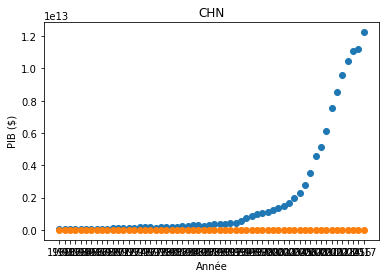

In [348]:
# Visualisation du FillNA
def ReplaceNA_PIB(df):
    dfavecna = df.fillna(0)
    dffillna = df.interpolate(method='linear', axis=0).ffill().bfill()
    dfdiff = dffillna - dfavecna
    plt.plot(dfavecna,'o')
    plt.plot(dfdiff,'o')
    plt.title(df.columns[0])
    plt.xlabel("Année")
    plt.ylabel("PIB ($)")
    return dffillna
    
dfssNA = ReplaceNA_PIB(df_pib2000.loc[:,["CHN"]])

In [287]:
# Recherche des pays ayant la plus forte variation de PIB
def MaxAmpPIB(df,Pays):
    return round(100*(df.loc[:,[Pays]].max()-df.loc[:,[Pays]].min())/df.loc[:,[Pays]].min(),1)
mARG = MaxAmpPIB(df_pib2000,"CHN")
mARG

CHN    3291.3
dtype: float64

In [286]:
for p in df_pib2000.columns:
    mag = MaxAmpPIB(df_pib2000,p)[0]
    if mag > 1000:
        print(p,mag)

AGO 3183.0
ALB 1928.3
AZE 2365.0
BIH 1422.0
CHN 3291.3
EAP 2123.1
ETH 1062.8
GHA 1169.9
GNQ 22110.4
KAZ 1302.6
KEN 1278.1
KWT 1482.0
LAO 1847.1
LBN 1787.5
MAC 1618.4
MDV 2162.1
MNG 1537.4
NGA 1948.5
NIC 1268.5
QAT 2895.9
RUS 1072.6
RWA 1112.2
SDN 1570.2
SUR 1247.9
TCD 1080.0
TEA 2123.5
TKM 1729.7
TLS 1417.5
TZA 1152.3
VNM 3357.8
